In [1]:
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import random as rd
import pprint as pp

%matplotlib inline

In [2]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    normalized_X = (X - mean)/std
    return normalized_X

In [3]:
def gradient_descent(X, y, learning_rate, num_iterations):
    num_params = X.shape[1]
    params = np.random.rand(1, num_params)
    params = np.squeeze(params) # convert 2D matrix to 1D array 
    m = float(len(y))
    for i in range(num_iterations):
        hypothesis = np.dot(X, params)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        gradient = np.dot(X.T, loss) / m
        params = params - learning_rate * gradient

    return params

In [4]:
data = pd.read_csv('CCPP.csv', nrows = 200)
points = np.genfromtxt('CCPP.csv', delimiter = ',', skip_header = 1)
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Features:
    1. AT: Temperature (1.81oC - 37.11oC)
    2. V: Exhaust Vacuum (5.36 - 81.5 cm Hg)
    3. AP: Ambient Pressure (992.89 - 1033.30 milibar)
    4. RH: Relative Humidity (25.56% - 100.16%)
Predict the net hourly electrical energy output (PE) of the plant

## Visualize the relationship between features and the output value

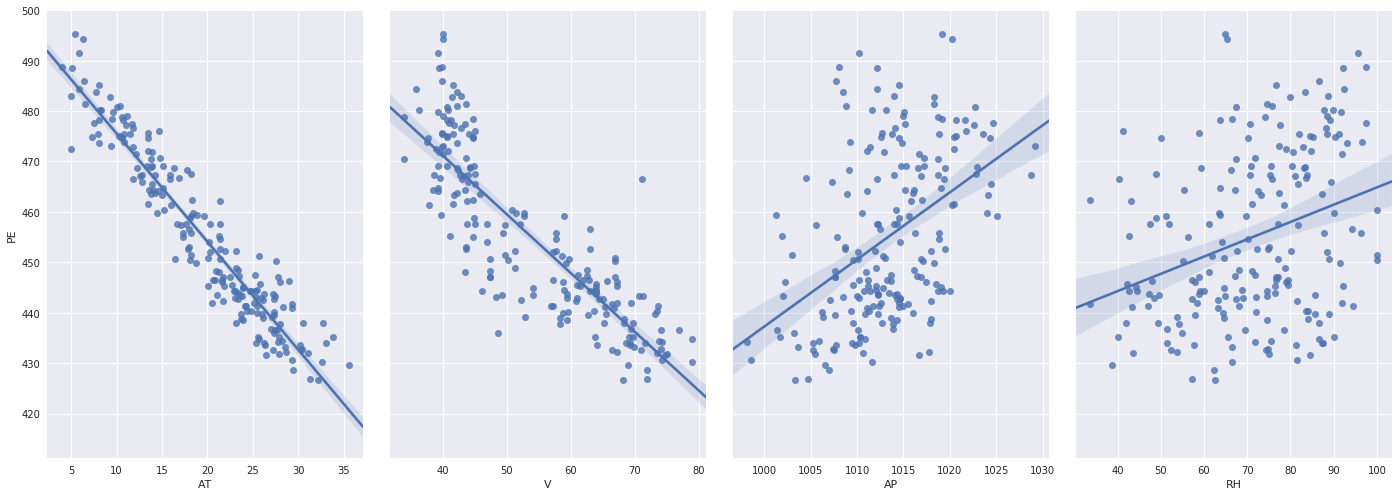

In [5]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['AT','V','AP', 'RH'], y_vars='PE', size=7, aspect=0.7, kind = 'reg')

## Split X and y into training and testing sets

In [6]:
# 70% train, 30% test
train, test = np.split(data.sample(frac=1), [int(.7*len(data))])
#print(train)
#print(test)

## Univariate linear regression

In [7]:
features = ['AT']
# create X and y
X_train = train[features]
y_train = train['PE']
X_test = test[features]
y_test = test.PE

In [8]:
X_train = normalize(X_train)
y_train = normalize(y_train)
X_test = normalize(X_test)
y_test = normalize(y_test)

### 1. Scikit-learn

In [9]:
def univariate_lr_sklearn(X_train, y_train):
    ulr = LinearRegression()
    ulr.fit(X_train, y_train)
    intercept = ulr.intercept_
    slope = ulr.coef_
    return float(slope), float(intercept)

### 2. Gradient Descent

In [10]:
b1_s, b0_s = univariate_lr_sklearn(X_train, y_train)
print ('sklearn: y = ' + str(b1_s) + 'AT + ' + str(b0_s))

sklearn: y = -0.9479039799595662AT + 3.722250082941558e-15


In [11]:
new_X_train = np.insert(X_train.as_matrix(), 0, 1, axis = 1)
new_y_train = y_train.as_matrix()
params = gradient_descent(new_X_train, new_y_train, learning_rate = 0.005, num_iterations = 5000)

print ('gradient descent: y = ' + str(params[1]) + 'AT + ' + str(params[0]))

gradient descent: y = -0.94790397994AT + 5.72494945045e-12


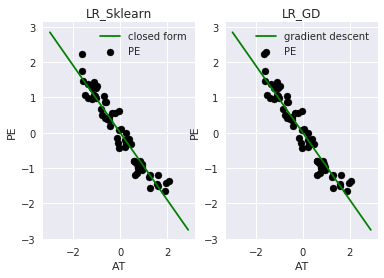

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test,  color='black')
x = np.r_[-3 : 3 : 0.1]
plt.plot(x, b1_s*x + b0_s, label = 'closed form', color = 'green')
plt.title('LR_Sklearn')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test,  color='black')
x = np.r_[-3 : 3 : 0.1]
plt.plot(x, params[1]*x + params[0], label = 'gradient descent', color = 'green')
plt.title('LR_GD')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend(loc = 'upper right')

## Bivariate linear regression

In [13]:
features = ['AT', 'V']
# create X and y
X_train = train[features]
y_train = train['PE']
X_test = test[features]
y_test = test.PE

In [14]:
X_train = normalize(X_train)
y_train = normalize(y_train)
X_test = normalize(X_test)
y_test = normalize(y_test)

### 1. Scikit-learn

In [15]:
def multivariate_lr_sklearn(X_train, y_train):
    blr = LinearRegression()
    blr.fit(X_train, y_train)
    intercept = blr.intercept_
    coef = blr.coef_
    return np.insert(coef, 0, intercept), blr

### 2. Gradient Descent

In [16]:
coef_s, blr = multivariate_lr_sklearn(X_train, y_train)
num_samples = 20000
new_X_train = np.insert(X_train.as_matrix()[:num_samples,:], 0, 1, axis = 1)
new_y_train = y_train.as_matrix()[:num_samples]

#params = gradient_descent(new_X_train, new_y_train, learning_rate = 0.00056, num_iterations = 175000)
params = gradient_descent(new_X_train, new_y_train, learning_rate = 0.005, num_iterations = 10000)

print ('sklearn: y = ' + str(coef_s[1]) + 'AT + ' + str(coef_s[2]) +  'V + ' + str(coef_s[0]))
print ('gradient descent: y = ' + str(params[1]) + 'AT + ' + str(params[2]) +  'V + ' + str(params[0]))



sklearn: y = -0.759313182947AT + -0.226601821546V + 3.61390679679e-15
gradient descent: y = -0.759236155386AT + -0.226678849107V + 3.60819124503e-15


### 3. Testing

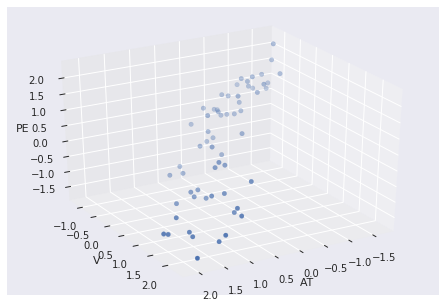

In [17]:
X_AT = X_test['AT'].values.tolist()
X_V = X_test['V'].values.tolist()
y_t = y_test.values.tolist()

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_AT, X_V, y_t)
ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('PE')
ax.view_init(azim=60)

plt.show()

### Plot Linear Regression with Gradient Descent

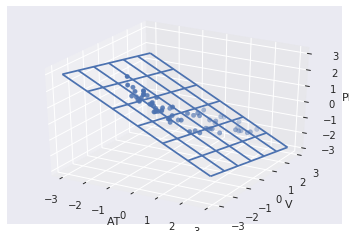

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3, 3, 0.1)
X, Y = np.meshgrid(x, y)
#zs = np.array([coef_s[0]+coef_s[1]*x+coef_s[2]*y for x,y in zip(np.ravel(X), np.ravel(Y))])
zs = np.array([params[0]+params[1]*x+params[2]*y for x,y in zip(np.ravel(X), np.ravel(Y))])

Z = zs.reshape(X.shape)

ax.scatter(X_AT, X_V, y_t)
ax.set_xlabel('AT')
ax.set_ylabel('V')
ax.set_zlabel('PE')
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
ax.view_init(30)
plt.show()

## Multivariate linear regression
Beside the first one, which is the bias is off, the weights of sklearn and my implementation are almost the same

In [19]:
features = ['AT', 'V', 'AP', 'RH']
# create X and y
X_train = train[features]
y_train = train['PE']
X_train = normalize(X_train)
y_train = normalize(y_train)

In [20]:
coef_s, mlr = multivariate_lr_sklearn(X_train, y_train)
num_samples = 1000
new_X_train = np.insert(X_train.as_matrix()[:num_samples,:], 0, 1, axis = 1)
new_y_train = y_train.as_matrix()[:num_samples]

params = gradient_descent(new_X_train, new_y_train, learning_rate = 0.005, num_iterations = 50000)


print('sklearn:')
pp.pprint(coef_s.tolist())
print('gradient descent')
pp.pprint(params.tolist())


sklearn:
[3.891720762636693e-15,
 -0.9241596300027608,
 -0.1202548214621524,
 0.006683123439378758,
 -0.16348549438954252]
gradient descent
[3.8874781361886794e-15,
 -0.9241596299238835,
 -0.12025482152097695,
 0.006683123457314916,
 -0.16348549436076193]


## Multivariate linear regression with categorical attributes

In [21]:
data = pd.read_csv('servo.data', sep=",", header = None)
data.columns = cols = ["motor", "screw", "pgain", "vgain", "class"]
data.head()

,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [22]:
idxCols = [0, 1, 2, 3]
for i in range(len(idxCols)):
    dummies = pd.get_dummies(data[cols[idxCols[i]]], prefix = cols[idxCols[i]]).iloc[:,1:]
    data = pd.concat([data, dummies], axis = 1)
data.head(9)

,motor,screw,pgain,vgain,class,motor_B,motor_C,motor_D,motor_E,screw_B,screw_C,screw_D,screw_E,pgain_4,pgain_5,pgain_6,vgain_2,vgain_3,vgain_4,vgain_5
0,E,E,5,4,0.281251,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,B,D,6,5,0.506252,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,D,D,4,3,0.356251,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,B,A,3,2,5.500033,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,D,B,6,5,0.356251,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
5,E,C,4,3,0.806255,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
6,C,A,3,2,5.100014,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,A,A,3,2,5.700042,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,C,A,6,5,0.768754,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


### Find Coefficient

In [23]:
features = ['motor_B', 'motor_C', 'motor_D', 'motor_E',\
            'pgain_4', 'pgain_5', 'pgain_6',\
            'vgain_2','vgain_3', 'vgain_4', 'vgain_5']

# 70% train, 30% test
train, test = np.split(data.sample(frac=1), [int(.7*len(data))])

# create X and y
X_train = train[features]
y_train = train['class']
X_test = test[features]
y_test = test['class']

X_train = normalize(X_train)
y_train = normalize(y_train)
X_test = normalize(X_test)
y_test = normalize(y_test)

In [24]:
coef_s, mlr = multivariate_lr_sklearn(X_train, y_train)
num_samples = 1000
new_X_train = np.insert(X_train.as_matrix()[:num_samples,:], 0, 1, axis = 1)
new_y_train = y_train.as_matrix()[:num_samples]

params = gradient_descent(new_X_train, new_y_train, learning_rate = 0.005, num_iterations = 50000)

print('sklearn:')
pp.pprint(coef_s.tolist())
print('gradient descent')
pp.pprint(params.tolist())

sklearn:
[6.516608589064034e-16,
 -0.030513340775127847,
 -0.09971615348486362,
 -0.2879633827615938,
 -0.16313088418011645,
 -0.9177460409960425,
 -0.6963991626896695,
 -0.6983348475644372,
 0.11372375412270132,
 0.15647817234879502,
 0.08136609672679843,
 0.08631203400664111]
gradient descent
[6.392098380628478e-16,
 -0.03051347841518865,
 -0.0997200576452942,
 -0.2879632958577912,
 -0.16313077854633778,
 -0.917743473351573,
 -0.6963946654052801,
 -0.6982588555371024,
 0.11371887607488233,
 0.15647529853476885,
 0.08136131253869315,
 0.08623521081254597]
